In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Set the display options
pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('display.max_rows', 1000)


#laod data 
df = pd.read_parquet('../data/transactions.parquet', engine='pyarrow')
df2 = df[0:7]
df2.to_csv('../EDA/df.csv', index=False)


#basic info on the data
display(df.info())

# getting nb of missing values
df.isna().sum()

# getting the number of unique values in each column
display(df.nunique())

#getting the duplicates in the data
print(f'number of duplicated row : {df.duplicated().sum()} ')  

# getting the first 5 rows of the data
display(df.head())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759889 entries, 0 to 1759888
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Shop                       int64  
 1   Order_Date_FK              int64  
 2   ProductCode                int64  
 3   OriginalSaleAmountInclVAT  float64
 4   CustomerID                 int64  
 5   SaleDocumentNumber         int64  
 6   Returned                   int64  
 7   RevenueInclVAT             float64
 8   CostPriceExclVAT           float64
 9   BrandName                  int64  
 10  ModelGroup                 int64  
 11  ProductGroup               int64  
dtypes: float64(3), int64(9)
memory usage: 161.1 MB


None

Shop                             85
Order_Date_FK                    76
ProductCode                   25946
OriginalSaleAmountInclVAT       309
CustomerID                   347862
SaleDocumentNumber           592981
Returned                          2
RevenueInclVAT                 8510
CostPriceExclVAT              19234
BrandName                       649
ModelGroup                       32
ProductGroup                      6
dtype: int64

number of duplicated row : 816535 


,Shop,Order_Date_FK,ProductCode,OriginalSaleAmountInclVAT,CustomerID,SaleDocumentNumber,Returned,RevenueInclVAT,CostPriceExclVAT,BrandName,ModelGroup,ProductGroup
0,36,20210730,-1968361059464632550,100,-2190786785520839526,23995792,0,75,37,3694837121284491212,3162564956579801398,-453682476182549203
1,58,20210730,-1745497788861904687,22,-3499949798555834600,23995794,0,22,7,-1657270726128381662,-6715310361529623819,-453682476182549203
2,49,20210730,-4482110002029860032,70,-7841417233849937172,23995797,0,38,24,-7202472198306336051,-248459121805647149,5294166889150293396
3,49,20210730,-9146072753857637799,100,-7841417233849937172,23995797,0,55,32,-2074012670196538378,-248459121805647149,5294166889150293396
4,15,20210730,-8829485741699345914,50,7033964597104594686,23995798,0,17,9,-4869459690934553786,-4124706989267335995,-453682476182549203


In [3]:
df_returned = df[(df['Returned'] == 1) & (df['Shop'] == 102)]
print(df_returned.shape)
display(df_returned.head())



(26262, 12)


,Shop,Order_Date_FK,ProductCode,OriginalSaleAmountInclVAT,CustomerID,SaleDocumentNumber,Returned,RevenueInclVAT,CostPriceExclVAT,BrandName,ModelGroup,ProductGroup
1438989,102,20210601,6961289240457125315,56,-9023214621860430971,23439249,1,56,21,-3734237314099258167,3162564956579801398,-453682476182549203
1438990,102,20210601,-4429596752666537216,50,-9023214621860430971,23439249,1,50,12,-8846961206607438497,3162564956579801398,-453682476182549203
1438992,102,20210601,-809234417370530414,70,-7283697151566111593,23439532,1,62,23,6164254645951948400,3162564956579801398,-453682476182549203
1438993,102,20210601,3871699072091721443,30,-5287955982418449235,23439540,1,30,11,8061942771077709349,3162564956579801398,-453682476182549203
1439006,102,20210601,-4103636245403816152,70,631949914336696504,23439838,1,67,23,-3693957764767261153,3162564956579801398,-453682476182549203


In [4]:
#investigating deeper the duplicates

df_dup = df[df.duplicated(keep=False)]
df_non_dup =df[~df.duplicated(keep=False)]

print(f"Number of duplicated rows: {len(df_dup)}")
print(f"Number of non duplicated rows: {len(df_non_dup)}")


df_dup_sort = df_dup.sort_values(by=['SaleDocumentNumber', 'ProductCode'])
df_non_dup = df_non_dup.sort_values(by=['SaleDocumentNumber', 'ProductCode'])

#display(df_non_dup.head(10))
#display(df_dup_sort.head(10))

# >> very high number of duplicates 





Number of duplicated rows: 1598863
Number of non duplicated rows: 161026


In [ ]:
#checking on duplicates distribution 

num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
# Group by all columns and count the size of each group and count 
duplicate_counts = df.groupby(df.columns.tolist()).size()
duplicate_distribution = duplicate_counts.value_counts().sort_index()

# Display the distribution
display(duplicate_distribution)


#calculate duplicate ratio related to Return 

df_returned = df[df['Returned'] == 1]
num_duplicates_returned = df_returned.duplicated().sum()
print(f"Number of duplicate rows related to returned: {num_duplicates_returned}")
print(f"Ratio of duplicates related to returned: {num_duplicates_returned / num_duplicates:.2%}")   

df_non_returned = df[df['Returned'] == 0]
num_duplicates_non_returned = df_non_returned.duplicated().sum()
print(f"Number of duplicate rows related to non returned: {num_duplicates_non_returned}")
print(f"Ratio of duplicates related to non returned: {num_duplicates_non_returned / num_duplicates:.2%}")

# only 3% of duplicates are related to return and looking into it nothing indicate they can't be legitimate duplicates
# 97% of duplicates are not related to return and they are mostly single duplicates. 
        # it means that around 85% of the sales are in double  (sames shoes, same shop, same day)
        # it is possible especially as a big part of the sales are done online (numerous client, double size buying)
        

Number of duplicate rows: 816535


1     161026
2     765897
3        124
4      15752
5          5
6        433
8         89
10        16
12         5
14         2
18         1
19         1
20         1
24         1
25         1
Name: count, dtype: int64

Number of duplicate rows related to returned: 21403
Ratio of duplicates related to returned: 2.62%
Number of duplicate rows related to non returned: 795132
Ratio of duplicates related to non returned: 97.38%


In [183]:
#checking non duplicate DF on repetitive products for identical invoice (= semi_duplicate for whatever other reasons)
semi_duplicates = df_non_dup.groupby(['SaleDocumentNumber', 'ProductCode']).size()
semi_duplicates = semi_duplicates[semi_duplicates > 1]
semi_duplicates = semi_duplicates.sort_values(ascending=False)
print(semi_duplicates)
len(semi_duplicates)

# few of them (2.8k out of 161K)
# and it seems mostly related to a return of 1 of the 2 item  >> 2 sizes attempts ?
# I leave them in as small and possible explanation of those semi-duplicates

 

SaleDocumentNumber  ProductCode         
23815640             4101533479629837146    4
23604046             6961289240457125315    4
23513876            -8924558817095665093    3
23583204             7640068766686716492    3
23441351             2104612900236091154    2
23881455            -6897597283025859077    2
23898899             8426257454039109130    2
23884013             8922861899214236956    2
23883723            -2858494098841308379    2
23882798            -306405191287033267     2
23882786            -5238663900010999427    2
23882304            -5573913674303612200    2
23882154            -729599442019836184     2
23881363            -5468610378478868584    2
23898972             2851877350284995451    2
23880249             6130522451459656154    2
                    -5369561327824984603    2
23879624             7989852180188780612    2
23879245             2441179640541013394    2
23878904            -1308338597850876110    2
23878771            -224542619215904924

1441

In [138]:
# Getting totals for the columns


df_total = df.agg({
    'OriginalSaleAmountInclVAT': 'sum',
    'Returned': 'sum',
    'RevenueInclVAT': 'sum',
    'CostPriceExclVAT': 'sum'
})

df_total['Total rows'] = len(df)

Tot_return_percentage = 100*df_total['Returned'] / df_total['Total rows']
avg_discount = 100*(df_total['OriginalSaleAmountInclVAT'] - df_total['RevenueInclVAT']) / df_total['OriginalSaleAmountInclVAT']
avg_profitability = 100*(df_total['RevenueInclVAT'] - df_total['CostPriceExclVAT']) / df_total['OriginalSaleAmountInclVAT']

df_total['Total return percentage'] = Tot_return_percentage
df_total['Average discount'] = avg_discount
df_total['Average profitability'] = avg_profitability


display(df_total)
df_total = df_total.to_frame()
df_total2 = df_total.T
display(df_total2)
display(df_total)




# Display the DataFrame
display(df_total2)



OriginalSaleAmountInclVAT   105,004,943
Returned                         67,795
RevenueInclVAT               86,278,857
CostPriceExclVAT             36,075,861
Total rows                    1,759,889
Total return percentage               4
Average discount                     18
Average profitability                48
dtype: float64

,OriginalSaleAmountInclVAT,Returned,RevenueInclVAT,CostPriceExclVAT,Total rows,Total return percentage,Average discount,Average profitability
0,"105,004,943","67,795","86,278,857","36,075,861","1,759,889",4,18,48


,0
OriginalSaleAmountInclVAT,"105,004,943"
Returned,"67,795"
RevenueInclVAT,"86,278,857"
CostPriceExclVAT,"36,075,861"
Total rows,"1,759,889"
Total return percentage,4
Average discount,18
Average profitability,48


,OriginalSaleAmountInclVAT,Returned,RevenueInclVAT,CostPriceExclVAT,Total rows,Total return percentage,Average discount,Average profitability
0,"105,004,943","67,795","86,278,857","36,075,861","1,759,889",4,18,48


In [201]:
# duplicate removal
print(f"Number of rows before removing duplicates: {len(df)}")

df = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(df)}")
print(f"Number of rows removed: {1759889-943354}")

Number of rows before removing duplicates: 943354
Number of rows after removing duplicates: 943354
Number of rows removed: 816535


In [16]:
# product analysis

# Calculate the total sales, total orders, and total returns for each product
sales_Product = df.groupby('ProductCode')['RevenueInclVAT'].sum()
total_orders_Product = df.groupby('ProductCode').size()
returns_Product = df.groupby('ProductCode')['Returned'].sum()

# Calculate the returns percentage
returns_percent_Product = round((returns_Product / total_orders_Product) * 100, 1)

# Combine the results into a DataFrame
df_Product = pd.concat([sales_Product, total_orders_Product, returns_Product, returns_percent_Product], axis=1)
df_Product.columns = ['Total sales(€)', 'Total orders', 'Total returns', 'Returns rate %']

# Sort the DataFrame by total sales and returns rate
df_Product_sorted = df_Product.sort_values(by='Total sales(€)', ascending=False)
df_Product_sorted_2 = df_Product.sort_values(by='Returns rate %', ascending=False)
df_top_returns = df_Product_sorted_2[df_Product_sorted_2['Returns rate %'] >= 20]


# Display the top 20 products by total sales and returns rate
display (len (df_Product))
display(len (df_top_returns))
print(df_top_returns['Total sales(€)'].sum())
print(df_top_returns['Total returns'].sum())

display(df_Product_sorted.head(20))
display(df_Product_sorted_2.head(20))



# all products with a return rate of more than X% maybe investigated , stopped or improved.

25946

2427

1931451.45
9757


,Total sales(€),Total orders,Total returns,Returns rate %
ProductCode,,,,
1259293089820910665,"164,174",2062,52,2
-8705147095127043671,"151,171",15184,22,0
-4948209024035896099,"121,605",1630,100,6
-3931578207495775992,"118,470",1390,37,3
-745373077535329727,"118,364",1274,16,1
8381309777199800342,"118,142",2163,62,3
-8338731118581731496,"113,174",1637,43,3
-6417061694869180234,"112,075",1986,42,2
-532758106016068543,"111,207",1126,30,3


,Total sales(€),Total orders,Total returns,Returns rate %
ProductCode,,,,
7505721145463112785,50,1,1,100
4173742187437758285,72,1,1,100
-7964181897855599745,100,1,1,100
-6319039761017779644,54,1,1,100
6860373374576860278,50,1,1,100
-9091124383032935469,150,1,1,100
-8325136053936641334,259,4,4,100
-7100811344898711600,90,1,1,100
-4739437920387635546,36,1,1,100


In [28]:
# shop analysis

# getting the total nb of transactions by shop and return rate 
tot_tx_shop = df.groupby('Shop').size()
tot_returns = df.groupby('Shop')['Returned'].sum()
returns_percent = (tot_returns/tot_tx_shop)*100                            

# Calculate the total sales by shop
total_sales = df.groupby('Shop')['OriginalSaleAmountInclVAT'].sum()

# Concatenate all series to the df_return DataFrame
df_return = pd.concat([tot_tx_shop, tot_returns, returns_percent, total_sales], axis=1)

# Rename the new columns
df_return.columns = ['Total transactions', 'Total returns', 'Returns rate (%)', 'Total sales']

# Reset the index so 'Shop' becomes a column
df_return = df_return.reset_index()

# sort by 'Shop'
df_return = df_return.sort_values(by='Shop', ascending=False)

# 'Shop' to be the index again after sorting
df_return = df_return.set_index('Shop')

# Continue with other sorts
df_return2 = df_return.sort_values(by='Returns rate (%)',ascending=False)
df_return3 = df_return.sort_values(by='Total transactions',ascending=False)

# Display the DataFrames
display(df_return.head(10))
display(df_return2.head(20))
display(df_return3.head(20))


# >> shop id 102/103 are online shop : most return, most transactions

,Total transactions,Total returns,Returns rate (%),Total sales
Shop,,,,
103,8901,1465,16,"690,706"
102,140456,26262,19,"10,113,714"
86,20368,558,3,"1,196,406"
85,19976,386,2,"1,144,701"
84,27126,656,2,"1,598,239"
83,25890,586,2,"1,554,238"
82,15018,382,3,"892,415"
81,20028,336,2,"1,217,841"
80,34720,714,2,"2,081,080"


,Total transactions,Total returns,Returns rate (%),Total sales
Shop,,,,
102,140456,26262,19,"10,113,714"
103,8901,1465,16,"690,706"
41,125,8,6,"7,097"
30,21512,850,4,"1,220,060"
68,22838,864,4,"1,414,619"
33,11930,424,4,"680,977"
6,18820,624,3,"994,769"
43,14812,468,3,"900,629"
47,18720,582,3,"1,059,260"


,Total transactions,Total returns,Returns rate (%),Total sales
Shop,,,,
102,140456,26262,19,"10,113,714"
9,38040,1032,3,"2,357,001"
80,34720,714,2,"2,081,080"
21,33596,812,2,"2,010,261"
7,30834,780,3,"1,781,460"
60,30832,562,2,"1,926,724"
19,30530,730,2,"1,932,318"
63,30122,832,3,"1,811,315"
18,29050,750,3,"1,654,404"


In [33]:
# shop profitability analysis 


# getting the total revenue by shop
tot_gross_sales_shop = round(df.groupby('Shop')['OriginalSaleAmountInclVAT'].sum(),0)
tot_net_sales_shop = round(df.groupby('Shop')['RevenueInclVAT'].sum(),0)
discount_avg_percent = round((tot_gross_sales_shop-tot_net_sales_shop)/tot_gross_sales_shop*100,1)
tot_cost_shop = round(df.groupby('Shop')['CostPriceExclVAT'].sum().sort_values(ascending=False), 0)
tot_profit_shop = tot_net_sales_shop - tot_cost_shop
tot_profit_percent_shop = round(tot_profit_shop/tot_gross_sales_shop*100,1)


df_profit = pd.concat([tot_gross_sales_shop, tot_net_sales_shop, discount_avg_percent, tot_cost_shop, tot_profit_shop, tot_profit_percent_shop],axis=1)
df_profit.columns = ['Gross Sales(€)','Net sales(€)','discount_%', ' cost(€)', 'profit(€)', 'profit_ratio (%)']

df_profit_sorted = df_profit.sort_values(by='Gross Sales(€)',ascending=False)
display(df_profit_sorted.head(5))

print(f"average_discount_rate = {100*(df['OriginalSaleAmountInclVAT'] - df['RevenueInclVAT']).sum() / df['OriginalSaleAmountInclVAT'].sum()}")
print(f"average_profitability = {100*(df['RevenueInclVAT'] - df['CostPriceExclVAT']).sum() / df['OriginalSaleAmountInclVAT'].sum()}")

# even b4 return impact on profitability , 102 is the less profitable shop in he top 50... becaue of higer discount rate
# nevertheless they sell 4 times more than the second one , less if you include the return impact on profitability

,Gross Sales(€),Net sales(€),discount_%,cost(€),profit(€),profit_ratio (%)
Shop,,,,,,
102,"10,113,714","7,729,917",24,"3,538,240","4,191,677",41
9,"2,357,001","1,961,631",17,"824,252","1,137,379",48
80,"2,081,080","1,701,838",18,"719,928","981,910",47
21,"2,010,261","1,655,826",18,"693,056","962,770",48
19,"1,932,318","1,595,753",17,"673,986","921,767",48


average_discount_rate = 17.83352788042863
average_profitability = 47.81012676683697


In [46]:
#client analysis

sales_cli = df.groupby('CustomerID')['RevenueInclVAT'].sum()
sales_nb_order_cli= df.groupby('CustomerID').size()
returns_cli = df.groupby('CustomerID')['Returned'].sum()
returns_percent_cli =round((returns_cli/sales_nb_order_cli)*100,1)

df_cli = pd.concat([sales_cli,sales_nb_order_cli,returns_cli,returns_percent_cli],axis=1)
df_cli.columns = ['Total sales(€)','Total orders','Total returns','Returns rate %']

df_cli_sorted = df_cli.sort_values(by='Total sales(€)',ascending=False)
df_cli_sorted_2 = df_cli.sort_values(by=['Returns rate %', 'Total returns'],ascending=False)
df_cli_sorted_3 = df_cli[(df_cli['Returns rate %'] > 33) & (df_cli['Total sales(€)'] > 1000)].sort_values(by= 'Returns rate %',ascending=False)


display(df_cli_sorted.head(20))
display(df_cli_sorted_2.head(20))
display(df_cli_sorted_3.head(20))
len(df_cli_sorted_3)

# couple of big clients have a high return rate, to be investigated / mitigated if possible 
# many client seems to abuse the system by ordering many time and returning sistematically  >> dig deeper on that front

,Total sales(€),Total orders,Total returns,Returns rate %
CustomerID,,,,
-5287955982418449235,"3,192,211",54277,7788,14
6455628090489614628,"373,402",7022,148,2
4572026730515361595,"369,123",7602,224,3
-4279123115125507326,"307,508",7961,177,2
-5274373356868953113,"301,682",6634,106,2
7591247793274378633,"291,742",6350,70,1
-8498262363228437611,"278,000",5968,118,2
7840434994797178313,"270,643",6116,80,1
8511723988262790979,"261,106",5058,82,2


,Total sales(€),Total orders,Total returns,Returns rate %
CustomerID,,,,
5772159691607134333,860,12,12,100
-8502662848934095165,195,10,10,100
-7290269494691977577,332,10,10,100
-4786226995276860225,340,10,10,100
6211433210126229706,526,10,10,100
6532585080466596103,438,10,10,100
1637598567569379893,727,9,9,100
-8794177867852457298,368,8,8,100
-6348961225634429133,240,8,8,100


,Total sales(€),Total orders,Total returns,Returns rate %
CustomerID,,,,
7936365843770105945,"1,477",25,24,96
6471099235537492036,"1,220",15,14,93
-871028786547495247,"1,320",18,16,89
-1063457567472064656,"1,019",16,14,88
6903166981849297281,"1,275",16,14,88
-9124022858134560203,"1,013",12,10,83
8134231494170906596,"1,028",11,9,82
-4200462092720752806,"1,509",19,15,79
2514040554810692761,"1,427",20,15,75


115

In [218]:
# model goup analysis ModelGroup

sales_model = df.groupby('ModelGroup')['RevenueInclVAT'].sum()
sales_nb_order_model= df.groupby('ModelGroup').size()
returns_model = df.groupby('ModelGroup')['Returned'].sum()
returns_percent_model =round((returns_model/sales_nb_order_model)*100,1)

df_model = pd.concat([sales_model, sales_nb_order_model, returns_model, returns_percent_model  ],axis=1)
df_model.columns = ['Total sales(€)','Total orders','Total returns','Returns rate %']


df_model_sorted = df_model.sort_values(by='Total sales(€)',ascending=False)
df_model_sorted_2 = df_model.sort_values(by='Returns rate %',ascending=False)
display(df_model_sorted.head(20))
display(df_model_sorted_2.head(20))

# some model group do have comparatively high return rate, no real conclusion there



,Total sales(€),Total orders,Total returns,Returns rate %
ModelGroup,,,,
-4124706989267335995,"39,935,520",703042,26310,4
3162564956579801398,"32,170,521",564852,30586,5
-248459121805647149,"3,717,768",71818,1494,2
-1330987452709117740,"2,799,950",38580,1534,4
-6715310361529623819,"1,724,325",64497,2857,4
8676381074854750838,"1,009,004",34771,1274,4
-2375149457939821456,"677,846",21986,330,2
-1172740817228586022,"652,706",20188,1225,6
-965590225519141271,"642,045",14728,519,4


,Total sales(€),Total orders,Total returns,Returns rate %
ModelGroup,,,,
-1172740817228586022,"652,706",20188,1225,6
3162564956579801398,"32,170,521",564852,30586,5
-3435156612027683252,"234,851",3032,165,5
-6715310361529623819,"1,724,325",64497,2857,4
-1330987452709117740,"2,799,950",38580,1534,4
8676381074854750838,"1,009,004",34771,1274,4
-6534481151174441087,"1,537",54,2,4
-4124706989267335995,"39,935,520",703042,26310,4
-3170699624988567198,"268,821",8285,310,4


In [220]:
# brand analysis

sales_brand = df.groupby('BrandName')['RevenueInclVAT'].sum()
sales_nb_order_brand= df.groupby('BrandName').size()
returns_brand = df.groupby('BrandName')['Returned'].sum()
returns_percent_brand =round((returns_brand/sales_nb_order_brand)*100,1)

df_brand = pd.concat([sales_brand, sales_nb_order_brand, returns_brand, returns_percent_brand],axis=1)
df_brand.columns = ['Total sales(€)','Total orders','Total returns','Returns rate %']


df_brand_sorted = df_brand.sort_values(by='Total sales(€)',ascending=False)
df_brand_sorted_2 = df_brand.sort_values(by='Returns rate %',ascending=False)
display(df_brand_sorted.head(20))
display(df_brand_sorted_2.head(20))


# some high sales brand seems to have comparatively an high return rate, to be investigated (quality)
# brand with very high return rate (above 50) should be stopped ? 



,Total sales(€),Total orders,Total returns,Returns rate %
BrandName,,,,
3694837121284491212,"7,138,087",94397,4783,5
-4445228402666777776,"5,972,100",101136,2363,2
-1671135878886367730,"5,175,861",110208,4362,4
6164254645951948400,"3,805,493",61916,3186,5
2163194981545980604,"3,624,693",71682,2882,4
7924821923969469977,"3,347,754",69957,2105,3
-4087396388609311917,"2,120,652",41403,1512,4
-3001169043836376081,"2,092,298",34392,1245,4
-3734237314099258167,"2,010,616",25889,2222,9


,Total sales(€),Total orders,Total returns,Returns rate %
BrandName,,,,
-1437369890310911040,144,1,1,100
4012095367902786064,80,1,1,100
2273757653109568324,78,3,2,67
8119575743500074315,"1,897",26,13,50
4717096102405955547,"5,584",72,31,43
2657840034576389085,"3,699",52,18,35
-7130095634701368819,"9,607",137,47,34
-7827463481178904503,"5,179",78,26,33
8235383088950964244,464,6,2,33


,Total sales(€),Total orders,Total returns,Returns rate %
OriginalSaleAmountInclVAT,,,,
100,"9,030,451",118274,5180,4
70,"8,987,500",148093,6277,4
66,"8,137,307",138995,4399,3
60,"6,351,422",130846,5548,4
50,"6,051,972",146038,5820,4
90,"6,000,100",82442,3808,5
80,"5,877,905",91581,3771,4
76,"3,522,865",54377,2469,4
56,"3,059,263",60065,2804,5


,Total sales(€),Total orders,Total returns,Returns rate %
OriginalSaleAmountInclVAT,,,,
220,352,4,2,50
100,100,2,1,50
97,242,4,2,50
200,"1,890",13,5,38
66,"2,862",47,17,36
80,210,3,1,33
80,"4,507",82,24,29
60,"1,447",33,9,27
215,806,4,1,25


,Total sales(€),Total orders,Total returns,Returns rate %
OriginalSaleAmountInclVAT,,,,
250,825,7,0,0
245,"1,102",8,0,0
240,"35,453",184,12,6
235,"3,384",15,2,13
230,"10,056",55,1,2
225,"2,250",10,0,0
220,"12,722",78,9,12
220,352,4,2,50
219,307,2,0,0


C:\Users\SL\AppData\Local\Temp\ipykernel_17712\3954651671.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_return_rate = df_amount.groupby('Sales bin')['Returns rate %'].mean()


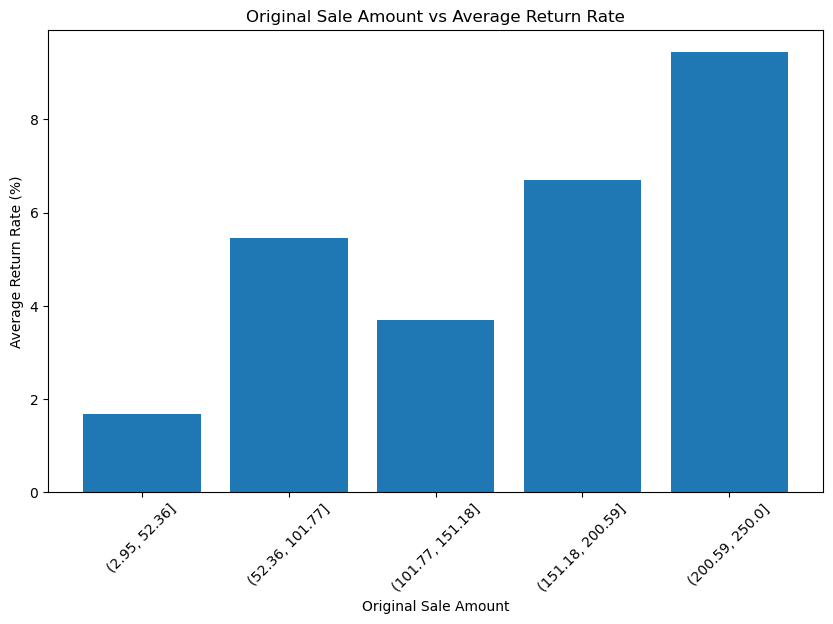

In [6]:
# amount analysis

sales_amount = df.groupby('OriginalSaleAmountInclVAT')['RevenueInclVAT'].sum()
sales_nb_order_amount= df.groupby('OriginalSaleAmountInclVAT').size()
returns_amount= df.groupby('OriginalSaleAmountInclVAT')['Returned'].sum()
returns_percent_amount =round((returns_amount/sales_nb_order_amount)*100,1)

df_amount = pd.concat([sales_amount, sales_nb_order_amount, returns_amount, returns_percent_amount],axis=1)
df_amount.columns = ['Total sales(€)','Total orders','Total returns','Returns rate %']


df_amount_sorted = df_amount.sort_values(by='Total sales(€)',ascending=False)
df_amount_sorted_2 = df_amount.sort_values(by='Returns rate %',ascending=False)
df_amount_sorted_3 = df_amount.sort_values(by='OriginalSaleAmountInclVAT',ascending=False)
display(df_amount_sorted.head(20))
display(df_amount_sorted_2.head(20))
display(df_amount_sorted_3.head(20))



# Define the bin edges
bin_edges = np.linspace(df_amount.index.min(), df_amount.index.max(), 6)

# Create the bins
df_amount['Sales bin'] = pd.cut(df_amount.index, bins=bin_edges)

# Calculate the average return rate for each bin
average_return_rate = df_amount.groupby('Sales bin')['Returns rate %'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_return_rate)), average_return_rate, tick_label=[str(b) for b in average_return_rate.index])

# Set the title and labels
plt.title('Original Sale Amount vs Average Return Rate')
plt.xlabel('Original Sale Amount')
plt.ylabel('Average Return Rate (%)')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

,Total sales(€),Total orders,Total returns,Returns rate %
DiscountLevel,,,,
0,"39,972,792",798700,29307,4
0,"3,210,024",59006,3008,5
0,"2,644,481",42543,1963,5
0,"1,689,197",23977,1164,5
0,"884,043",17149,628,4
0,"851,786",13529,519,4
0,"834,449",9436,552,6
0,"833,030",7187,525,7
0,"795,052",21390,1168,6


,Total sales(€),Total orders,Total returns,Returns rate %
DiscountLevel,,,,
0,110,2,2,100
0,105,2,2,100
0,66,1,1,100
0,40,1,1,100
0,53,2,2,100
0,44,1,1,100
0,21,2,2,100
0,94,2,2,100
0,81,2,2,100


C:\Users\SL\AppData\Local\Temp\ipykernel_17712\1527826601.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_return_rate = df_discount.groupby('Discount bin')['Returns rate %'].mean()


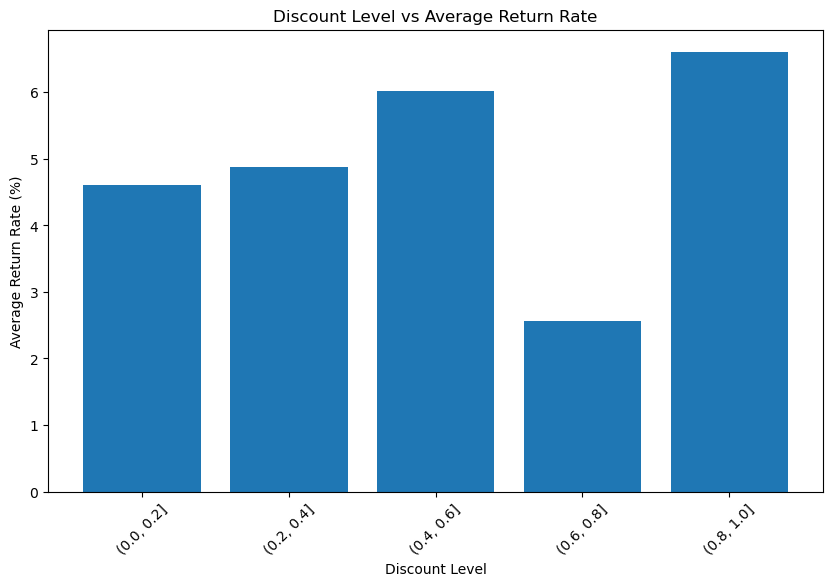

In [47]:
# Calculate the discount level
df['DiscountLevel'] = (df['OriginalSaleAmountInclVAT'] - df['RevenueInclVAT']) / df['OriginalSaleAmountInclVAT']

# Group by discount level
sales_discount = df.groupby('DiscountLevel')['RevenueInclVAT'].sum()
sales_nb_order_discount = df.groupby('DiscountLevel').size()
returns_discount = df.groupby('DiscountLevel')['Returned'].sum()
returns_percent_discount = round((returns_discount / sales_nb_order_discount) * 100, 1)

# Concatenate all series to the df_discount DataFrame
df_discount = pd.concat([sales_discount, sales_nb_order_discount, returns_discount, returns_percent_discount], axis=1)

# Rename the new columns
df_discount.columns = ['Total sales(€)', 'Total orders', 'Total returns', 'Returns rate %']

# Sort the DataFrame
df_discount_sorted = df_discount.sort_values(by='Total sales(€)', ascending=False)
df_discount_sorted_2 = df_discount.sort_values(by='Returns rate %', ascending=False)

# Display the DataFrames
display(df_discount_sorted.head(20))
display(df_discount_sorted_2.head(20))

# Define the bin edges
bin_edges = np.linspace(df_discount.index.min(), df_discount.index.max(), 6)

# Create the bins
df_discount['Discount bin'] = pd.cut(df_discount.index, bins=bin_edges)

# Calculate the average return rate for each bin
average_return_rate = df_discount.groupby('Discount bin')['Returns rate %'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_return_rate)), average_return_rate, tick_label=[str(b) for b in average_return_rate.index])

# Set the title and labels
plt.title('Discount Level vs Average Return Rate')
plt.xlabel('Discount Level')
plt.ylabel('Average Return Rate (%)')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()